In [249]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier                                        # Вызов метода k-ближайших соседей
from sklearn.svm import SVC                                                               # Вызов метода опорных векторов
from sklearn.linear_model import LogisticRegression                                       # Вызов метода логистической регрессии
from sklearn.naive_bayes import GaussianNB                                                # Вызов метода Байеса (Гауссовский) 
from sklearn import tree                                                                  # Вызов дерева решений 
from sklearn.ensemble import RandomForestClassifier                                       # Вызов рандомного леса

from sklearn.metrics import accuracy_score

In [250]:
rootpath = '~/OneDrive/Desktop/Programming/DS/datasets/old/iris'                         # Считываем данные
train_data, test_data = pd.read_csv(rootpath + '/train_iris.csv'), pd.read_csv(rootpath + '/test_iris.csv')

<AxesSubplot:xlabel='petal length', ylabel='petal width'>

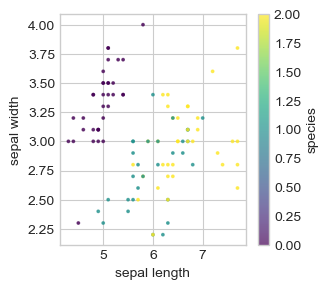

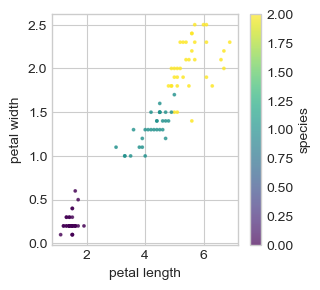

In [251]:
train_data.plot.scatter('sepal length', 'sepal width', figsize=(3, 3), s=3, alpha=0.7, c='species', cmap='viridis')
train_data.plot.scatter('petal length', 'petal width', figsize=(3, 3), s=3, alpha=0.7, c='species', cmap='viridis')

In [127]:
X_train = train_data.drop(['Unnamed: 0', 'species'], axis = 1)                  # Разделяем данные на X(предикторы) и y(отклики)
y_train = train_data.species
X_test = test_data.drop(['Unnamed: 0', 'species'], axis = 1)
y_test = test_data.species

In [192]:
from sklearn.model_selection import train_test_split
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

In [184]:
clf_1 = KNeighborsClassifier(n_neighbors=20)                                      # Метод k-ближайших соседей
clf_1.fit(X_train_train, y_train_train)

KNeighborsClassifier(n_neighbors=20)

In [185]:
print(f'accuracy: {accuracy_score(y_train_test, clf_1.predict(X_train_test))}')
print(f'accuracy: {accuracy_score(y_test, clf_1.predict(X_test))}')

accuracy: 0.925
accuracy: 0.96


In [186]:
clf_2 = SVC(kernel='linear')                                                      # Метод опорных векторов
clf_2.fit(X_train_train, y_train_train)

SVC(kernel='linear')

In [187]:
print(f'accuracy: {accuracy_score(y_train_test, clf_2.predict(X_train_test))}')
print(f'accuracy: {accuracy_score(y_test, clf_2.predict(X_test))}')

accuracy: 0.975
accuracy: 0.96


In [188]:
clf_3 = LogisticRegression(random_state=0)                                        # Метод логистической регрессии
clf_3.fit(X_train_train, y_train_train)

LogisticRegression(random_state=0)

In [189]:
print(f'accuracy: {accuracy_score(y_train_test, clf_3.predict(X_train_test))}')
print(f'accuracy: {accuracy_score(y_test, clf_3.predict(X_test))}')

accuracy: 0.975
accuracy: 0.94


In [190]:
clf_4 = GaussianNB()                                                              # Гауссовский метод Байеса
clf_4.fit(X_train_train, y_train_train)

GaussianNB()

In [191]:
print(f'accuracy: {accuracy_score(y_train_test, clf_4.predict(X_train_test))}')
print(f'accuracy: {accuracy_score(y_test, clf_4.predict(X_test))}')

accuracy: 0.95
accuracy: 0.96


In [208]:
clf_5 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3)                          # Дерево решений
clf_5.fit(X_train_train, y_train_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [209]:
print(f'accuracy: {accuracy_score(y_train_test, clf_5.predict(X_train_test))}')
print(f'accuracy: {accuracy_score(y_test, clf_5.predict(X_test))}')

accuracy: 0.975
accuracy: 0.96


In [240]:
clf_6 = RandomForestClassifier(criterion = 'entropy')                                       # Рандомный лес
parametr = {'n_estimators' : [4,5,6], 'max_depth' : [2,3,4], 'min_samples_leaf' : [1,2,3]}

In [241]:
from sklearn.model_selection import GridSearchCV
gridsearchCV_clf = GridSearchCV(clf_6, parametr, cv=5)
gridsearchCV_clf.fit(X_train_train, y_train_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [2, 3, 4], 'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [4, 5, 6]})

In [242]:
gridsearchCV_clf.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 4}

In [248]:
best_clf = gridsearchCV_clf.best_estimator_
print(f'accuracy: {best_clf.score(X_train_test, y_train_test)}')
print(f'accuracy: {best_clf.score(X_test, y_test)}')

accuracy: 0.95
accuracy: 0.94
